## Analysis of RoyMech Anthropometric Data
Source: https://roymech.org/Useful_Tables/Human/Human_sizes.html

In [1]:
from tools import calc_joint_positions, plot_skeleton, generate_samples, calculate_distances, calc_angles
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
from scipy.stats import norm

### Reading RoyMech Dataset

In [2]:
df = pd.read_csv('roymech_data.csv', sep=r'\s+')
df.head()

,Dimension,Man5,Man50,Man95,Woman5,Woman50,Woman95
0,1-Height,1630,1745,1860,1510,1620,1730
1,2-Eye,1520,1640,1760,1410,1515,1620
2,3-Shoulder_Height,1340,1445,1550,1240,1330,1420
3,4-Elbow_Height,1020,1100,1180,950,1020,1090
4,5-Hip_Height,850,935,1020,750,820,890


In [3]:
df = df.set_index('Dimension').transpose()

data = pd.DataFrame()
data['TorsoHeight'] = df['10-Sitting_Shoulder']
data['UpperArm'] = df['3-Shoulder_Height'] - df['4-Elbow_Height']
data['Forearm'] = df['4-Elbow_Height'] - df['6-Knuckle_Height(Fist_grip_height)']
data['ThighLength'] = df['14-Buttock-popliteal_length']
data['LowerLeg'] = df['16-Popliteal_Height(Lower_leg_Length)']
data['FootLength'] = df['30-Foot_Length']

data

,TorsoHeight,UpperArm,Forearm,ThighLength,LowerLeg,FootLength
Man5,570,320,320,450,410,240
Man50,615,345,335,510,450,265
Man95,660,370,350,570,490,290
Woman5,530,290,280,440,370,220
Woman50,580,310,300,500,410,240
Woman95,630,330,320,560,450,260


### Visualsing 2D Human Skeleton + Calculating Dimensions A & B

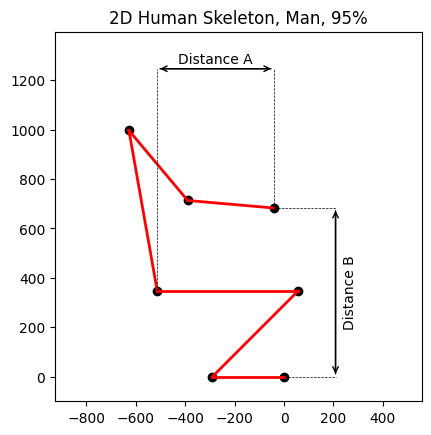

A (Horizontal distance):  471.89 mm
B (Vertical distance):  682.51 mm


In [12]:
# Input gender and percentile
gender = 'Man'
percentile = '95'
angles_in = [45, 45, 100, 30, 135]

# Calculate and plot joints
joints = calc_joint_positions(data, gender, percentile, angles_in)
plot_skeleton(joints, dists = True, gender=gender, percentile=percentile)

# Calculate the required distances
distance_A, distance_B = calculate_distances(joints)

# Output the distances
print(f"A (Horizontal distance): {distance_A: .2f} mm")
print(f"B (Vertical distance): {distance_B: .2f} mm")

In [ ]:
pd.read_csv('/Users/kaiwills/Desktop/MEng Engineering Design/YEAR 4/IRP - Individual Research Project/Parametric Modelling/outputs/roymech/AB_values.csv', skiprows = 2)


,Percentile,WomanA,WomanB,ManA,ManB
0,5,373.31,537.02,424.49,578.23
1,95,421.50,657.94,471.89,682.51


### Sample Generation for PCA

615
13.677811550151976


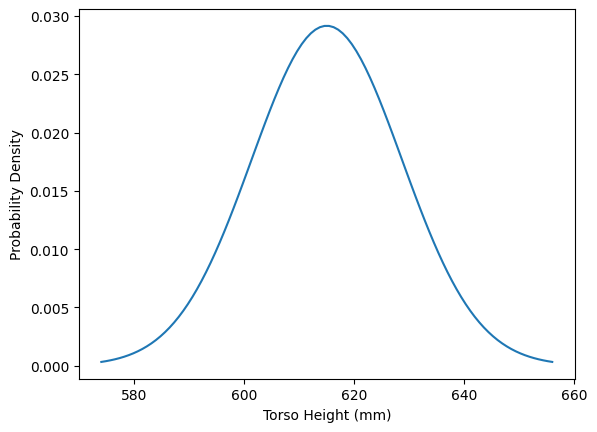

In [5]:
mu = data['TorsoHeight']['Man50']
# sigma = (data['TorsoHeight']['Man95'] - data['TorsoHeight']['Man50']) / (2 * norm.ppf(0.95))
sigma = (data['TorsoHeight']['Man95'] - data['TorsoHeight']['Man50']) / 3.29

print(mu)
print(sigma)

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y =  stats.norm.pdf(x, mu, sigma)

plt.plot(x,y)

plt.xlabel('Torso Height (mm)')
plt.ylabel('Probability Density')
plt.show()

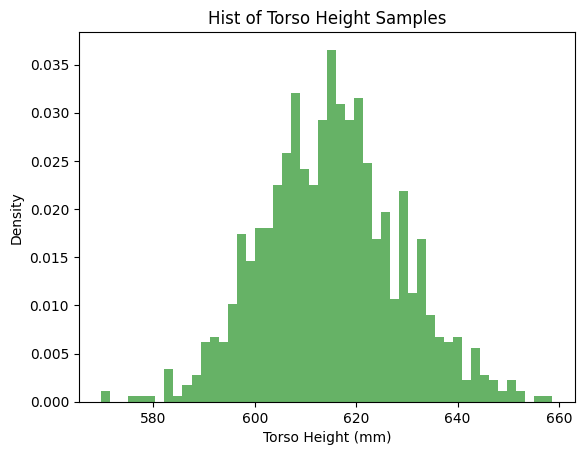

In [6]:
torso = np.random.normal(mu, sigma, 1000)

plt.hist(torso, bins=50, density=True, alpha=0.6, color='g')
plt.xlabel('Torso Height (mm)')
plt.ylabel('Density')
plt.title('Hist of Torso Height Samples')
plt.show()

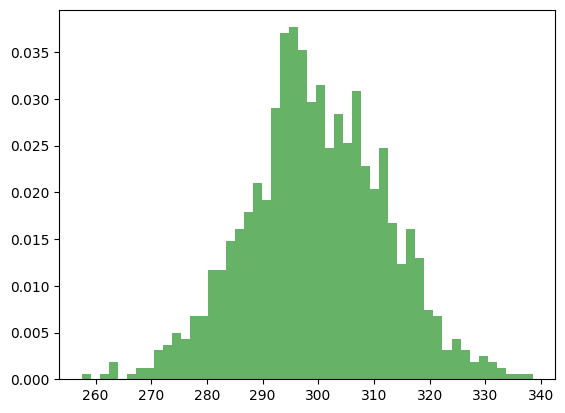

In [7]:
womantorso = generate_samples(data, 'Forearm', 'Woman')
plt.hist(womantorso, bins=50, density=True, alpha=0.6, color='g')
plt.show()